Data Science Immersive | Project X

Your project will be assessed using the following standards, derived from the data science workflow:

-  Acquisition: aquire books from books (tradegies, comedies) from Guttneberg Library + web (3 tragedies, 3 comedies - different authors)
 
-  Parse Data (i.e. turning text into features): estimate nltk ratios, lexical diversity, etc. Apply methods, look for any similaritites between authors/ books of any particular author. Find out main lexical differencies of comedies/tragedies
 
-  Mine Data (i.e. finding interesting relationships): try to buid relationships for occurances of words/phrases in a text. Any particular phrases appear in the beginning/middle/end of a text? Compare between different authors? the same author between diffrent books? authors from different countries?

-- What's the difference between tragedy in rythm and prose?
 
-  Modelling:  try to build model to predict how to write book being any particular author? try differents models
 
-  Evaluating your Model
 
-  Presenting Results
 
Task: Are sad stories 100% sad, or do they start happy and have a sad ending? What out comedies? You could find out by doing sentiment analysis on different parts of these books.

## 1. Acquisition

In [509]:
import nltk
import pandas as pd
import requests
import bs4
import nltk.stem
import nltk.stem.porter
import nltk.stem.snowball
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
snowball = nltk.stem.snowball.SnowballStemmer("english")
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('seaborn-white')


In [163]:
gutenberg = nltk.corpus.gutenberg.fileids()

I tried to perform reading from a webpage (gutenberg.org):

#drama_1 = requests.get(url = 'http://www.gutenberg.org/files/53127/53127-0.txt')

but there was notice that myid would be blocked for scraping, so I downloaded files

In [475]:
dostoevsky = open('dostoevsky.txt').read()
shakespeare_tragedy = open('hamlet.txt').read()
ilfpetrov = open('ilf_petrov.txt').read()
wilde = open('an_ideal_husband.txt').read()
shakespeare_comedy = open('comedy.txt').read()
dickens = open('olivertwist.txt').read()

In [476]:
print ("dostoevsky -", len(dostoevsky),
       "hamlet -", len(shakespeare_tragedy),
       "12chairs -", len(ilfpetrov),
       "ideal_husband -", len(wilde),
       "comedy_of_errors -", len(shakespeare_comedy),
       "oliver_twist - ", len(dickens))

dostoevsky - 1149516 hamlet - 162901 12chairs - 657142 ideal_husband - 198956 comedy_of_errors - 294185 oliver_twist -  331895


In [477]:
dostoevsky_words = nltk.word_tokenize(dostoevsky)
len(dostoevsky_words)

253335

In [149]:
wilde

'ï»¿The Project Gutenberg eBook of An Ideal Husband, by Oscar Wilde\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\n\n\n\nTitle: An Ideal Husband\n       A Play\n\n\nAuthor: Oscar Wilde\n\n\n\nRelease Date: March 27, 2009  [eBook #885]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n\n***START OF THE PROJECT GUTENBERG EBOOK AN IDEAL HUSBAND***\n\n\nTranscribed from the 1912 Methuen and Co. edition by David Price, email\nccx074@pglaf.org\n\n\n\n\n\n                             AN IDEAL HUSBAND\n\n\n                                  A PLAY\n\n                                    BY\n                               OSCAR WILDE\n\n                                * * * * *\n\n                            METHUEN & CO. LTD.\n                           36 ESSEX STREET W.C.\n  

In [109]:
shakespeare_tragedy = nltk.corpus.gutenberg.words("shakespeare-hamlet.txt")
len(shakespeare_tragedy)

37360

In [110]:
ilfpetrov = requests.get(url = 'http://lib.ru/ILFPETROV/ilf_petrov_12_chairs_engl.txt')
ilf_ru_comedy = ilfpetrov.text
len(ilf_ru_comedy)

661071

In [111]:
en_comedy = requests.get(url ='http://www.gutenberg.org/files/885/885-0.txt')
wilde = en_comedy.text


In [112]:
eng_drama = requests.get(url = 'http://www.gutenberg.org/files/47529/47529-0.txt')
dickens = eng_drama.text

In [113]:
eng_comedy_rythm = requests.get(url = 'http://www.gutenberg.org/ebooks/23046')
shakespeare_comedy = eng_comedy_rythm.text

In [48]:
books =pd.DataFrame({ 'Comedy': pd.Categorical(['shakespeare_comedy', 'ilfpetrov', 'wilde']),
                        "Tragedy": pd.Categorical(['shakespeare_tragedy', 'dostoevsky', 'dickens'])
                   })
books

,Comedy,Tragedy
0,shakespeare_comedy,shakespeare_tragedy
1,ilfpetrov,dostoevsky
2,wilde,dickens


## 2. Parse Data

In [26]:
nltk.sent_tokenize("This is a sentence. So is this.")

['This is a sentence.', 'So is this.']

In [27]:
books_list = [shakespeare_comedy, shakespeare_tragedy, ilfpetrov, dostoevsky, wilde, dickens]
dostoevsky_sent = nltk.sent_tokenize(dostoevsky)
shakespeare_comedy_sent = nltk.sent_tokenize(shakespeare_comedy)
shakespeare_tragedy_sent = nltk.sent_tokenize(shakespeare_tragedy)
ilfpetrov_sent = nltk.sent_tokenize(ilfpetrov)
wilde_sent = nltk.sent_tokenize(wilde)
dickens_sent = nltk.sent_tokenize(dickens)

In [133]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(shakespeare_comedy):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 5429
Word count overall 61951
Words per sentence 11.411125437465463
Vocabulary 9257
Lexical diversity = 0.14942454520508144


In [57]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(shakespeare_tragedy):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 2355
Word count overall 33989
Words per sentence 14.432696390658174
Vocabulary 4810
Lexical diversity = 0.1415163729441878


In [31]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(dostoevsky):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 14799
Word count overall 240566
Words per sentence 16.25555780796
Vocabulary 10331
Lexical diversity = 0.042944555756008744


In [143]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(dickens):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 2199
Word count overall 66239
Words per sentence 30.122328331059574
Vocabulary 7583
Lexical diversity = 0.11447938525641993


In [144]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(wilde):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 4961
Word count overall 37255
Words per sentence 7.509574682523684
Vocabulary 3980
Lexical diversity = 0.10683129781237417


In [147]:
word_counts = []
words_used = set()
for sent in nltk.sent_tokenize(ilfpetrov):
    words = [x for x in nltk.word_tokenize(sent) if x not in ['.', '?']]
    word_counts.append(len(words))
    for w in words:
        words_used.add(w.upper())#print ("Word counts per sentence",word_counts)
print ("Number of sentences", len(word_counts))
print ("Word count overall", sum(word_counts))
print ("Words per sentence", sum(word_counts)/ len(word_counts))
print ("Vocabulary", len(words_used))
print ("Lexical diversity =", 1.0 * len(words_used) / sum(word_counts))

Number of sentences 9881
Word count overall 120319
Words per sentence 12.176803967209796
Vocabulary 11276
Lexical diversity = 0.09371753422152777


#  3.Mine data

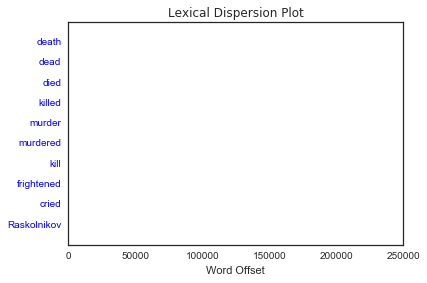

In [510]:
words_dostoevsky = nltk.word_tokenize(dostoevsky)
d = nltk.Text(words_dostoevsky)
#d.concordance('Raskolnikov')
d.dispersion_plot(['death', 'dead','died', 'killed', 'murder', 'murdered', 'kill', 'frightened', 'cried', 'Raskolnikov'])

In [44]:
words_dickens = nltk.word_tokenize(dickens)
di = nltk.Text(words_dickens)
di.dispersion_plot(['orphan', 'night','cry', 'cried', 'Oliver', 'miserable', 'died', 'die'])

In [71]:
words_tragedy = nltk.word_tokenize(shakespeare_tragedy)
sh_tragedy = nltk.Text(words_tragedy)
sh_tragedy.dispersion_plot(['death', 'dead','Hamlet', 'Ghost', 'poore', 'Madnesse', 'madnesse', 'kill', 'blood'])

In [78]:
words_comedy = nltk.word_tokenize(shakespeare_comedy)
sh_comedy = nltk.Text(words_comedy)
sh_comedy.dispersion_plot(['death', 'confusion','welcome', 'merry', 'humour', 'great', 'friend', 'feast'])

In [87]:
words_wilde = nltk.word_tokenize(wilde)
wil = nltk.Text(words_wilde)
wil.dispersion_plot(['dear', 'good','hope', 'like', 'love', 'happiness', 'great', 'glad'])

In [96]:
words_ilfpetrov = nltk.word_tokenize(ilfpetrov)
wil = nltk.Text(words_ilfpetrov)
wil.dispersion_plot(['dear', 'good','hope', 'like', 'love', 'happiness', 'great', 'laugh', 'friend'])

In [42]:
from nltk.probability import FreqDist
fdist_dostoevsky = FreqDist(dostoevsky_words)
sorted(w for w in set(dostoevsky_words) if len(w) > 7 and fdist_dostoevsky[w] > 20)
#fdist_dostoevsky.most_common(100)

['Alexandrovna',
 'Foundation',
 'Good-bye',
 'Gutenberg',
 'Gutenberg-tm',
 'Ivanovna',
 'Katerina',
 'Lebeziatnikov',
 'Lizaveta',
 'Marmeladov',
 'Nastasya',
 'Petersburg',
 'Petrovitch',
 'Petrovna',
 'Prokofitch',
 'Pulcheria',
 'Raskolnikov',
 'Razumihin',
 'Romanovitch',
 'Romanovna',
 'Semyonovitch',
 'Semyonovna',
 'Suddenly',
 'SvidrigaÃ¯lov',
 'Zossimov',
 'acquaintance',
 'addressing',
 'afterwards',
 'although',
 'altogether',
 'answered',
 'anything',
 'apparently',
 'appearance',
 'appeared',
 'attention',
 'beforehand',
 'beginning',
 'business',
 'carefully',
 'certainly',
 'character',
 'children',
 'circumstances',
 'complete',
 'completely',
 'condition',
 'consider',
 'continually',
 'continued',
 'contrary',
 'conversation',
 'conviction',
 'convinced',
 'creature',
 'criminal',
 'daughter',
 'declared',
 'delighted',
 'delirious',
 'delirium',
 'different',
 'difficult',
 'directly',
 'drinking',
 'education',
 'electronic',
 'entrance',
 'especially',
 'everyone

In [47]:
from nltk.probability import FreqDist
fdist_dickens = FreqDist(words_dickens)
sorted(w for w in set(words_dickens) if len(w) > 5 and fdist_dickens[w] > 20)

['Bedwin',
 'Brownlow',
 'Bumble',
 'Charley',
 'Dodger',
 'Foundation',
 'Gamfield',
 'Grimwig',
 'Gutenberg',
 'Gutenberg-tm',
 'Master',
 'OLIVER',
 'Oliver',
 'Oliver’s',
 'Project',
 'Sowerberry',
 'against',
 'another',
 'anything',
 'beadle',
 'before',
 'behind',
 'better',
 'between',
 'brought',
 'corner',
 'course',
 'electronic',
 'enough',
 'exclaimed',
 'friend',
 'gentleman',
 'gentlemen',
 'having',
 'himself',
 'however',
 'indeed',
 'inquired',
 'length',
 'little',
 'looked',
 'looking',
 'manner',
 'master',
 'matter',
 'minutes',
 'moment',
 'morning',
 'nothing',
 'parish',
 'passed',
 'people',
 'person',
 'rather',
 'replied',
 'returned',
 'seemed',
 'should',
 'something',
 'stairs',
 'street',
 'that’s',
 'thought',
 'through',
 'turned',
 'undertaker',
 'waistcoat',
 'walked',
 'whether',
 'without',
 'workhouse']

In [13]:
fdist_dostoevsky.plot(50, cumulative=True)

In [61]:
fdist_tragedy = FreqDist(words_tragedy)
sorted(w for w in set(words_tragedy) if len(w) > 4 and fdist_tragedy[w] > 10)

['Denmarke',
 'England',
 'Enter',
 'Exeunt',
 'Father',
 'Fathers',
 'Fortinbras',
 'Friends',
 'Gentlemen',
 'Gertrude',
 'Ghost',
 'Guild',
 'Guildensterne',
 'Hamlet',
 'Heauen',
 'Horatio',
 'Laertes',
 'Looke',
 'Madam',
 'Mother',
 'Nature',
 'Noble',
 'Ophelia',
 'Other',
 'Players',
 'Polon',
 'Polonius',
 'Queene',
 'Reynol',
 'Rosin',
 'Rosincrance',
 'Sonne',
 'Soule',
 'There',
 'Vertue',
 'Where',
 'Which',
 'Would',
 'about',
 'againe',
 'against',
 'beare',
 'beene',
 'before',
 'beleeue',
 'better',
 'betweene',
 'blood',
 'breath',
 'cause',
 'comes',
 'could',
 'death',
 'deere',
 'downe',
 'drinke',
 'earth',
 'faire',
 'farre',
 'feare',
 'finde',
 'first',
 'follow',
 'foule',
 'further',
 'great',
 'heard',
 'heare',
 'heart',
 'heere',
 'himselfe',
 'indeed',
 'keepe',
 'kinde',
 'leaue',
 'little',
 'looke',
 'madnesse',
 'makes',
 'matter',
 'meane',
 'meanes',
 'might',
 'neuer',
 'night',
 'nothing',
 'other',
 'please',
 'poore',
 'purpose',
 'right',
 'see

In [74]:
fdist_comedy = FreqDist(words_comedy)
sorted(w for w in set(words_comedy) if len(w) > 4 and fdist_comedy[w] > 10)

['Abbess',
 'Adriana',
 'Angela',
 'Angelo',
 'Antipholus',
 'Balthazar',
 'COMEDY',
 'Capell',
 'Changed',
 'Clarke',
 'Comedy',
 'Courtesan',
 'Dromio',
 'Dromios',
 'Drotnio',
 'ERRORS',
 'English',
 'Enter',
 'Ephesus',
 'Epidamnum',
 'Errors',
 'Halliwell',
 'Hanmer',
 'Henry',
 'INTRODUCTION',
 'Johnson',
 'Latin',
 'London',
 'Luciana',
 'Malone',
 'Master',
 'Merchant',
 'NOTES',
 'Officer',
 'Pinch',
 'Plautus',
 'Rolfe',
 'SCENE',
 'Scene',
 'Schmidt',
 'Shakespeare',
 'Shakspere',
 'Steevens',
 'Syracuse',
 'There',
 'These',
 'Where',
 'Which',
 'about',
 'above',
 'action',
 'after',
 'again',
 'against',
 'allusion',
 'almost',
 'alone',
 'among',
 'another',
 'answer',
 'before',
 'being',
 'below',
 'better',
 'between',
 'bound',
 'break',
 'bring',
 'brother',
 'called',
 'cause',
 'chain',
 'changed',
 'character',
 'characters',
 'charge',
 'cites',
 'comedy',
 'comes',
 'common',
 'confusion',
 'conjecture',
 'corrected',
 'could',
 'course',
 'death',
 'didst',
 '

In [85]:
fdist_wilde = FreqDist(words_wilde)
sorted(w for w in set(words_wilde) if len(w) >= 4 and fdist_wilde[w] > 30)

['Arthur',
 'CAVERSHAM',
 'CHEVELEY',
 'CHILTERN',
 'Cheveley',
 'Chiltern',
 'GORING',
 'Gertrude',
 'Goring',
 'Gutenberg-tm',
 'LADY',
 'LORD',
 'Lady',
 'Lord',
 'MABEL',
 'MARKBY',
 'MRS.',
 'Mrs.',
 'PHIPPS',
 'Project',
 'ROBERT',
 'Robert',
 'That',
 'There',
 'Well',
 'What',
 '_The',
 '_and',
 'about',
 'always',
 'anything',
 'been',
 'come',
 'could',
 'dear',
 'donâ€™t',
 'down',
 'father',
 'from',
 'going',
 'good',
 'great',
 'have',
 'here',
 'hope',
 'into',
 'know',
 'letter',
 'life',
 'like',
 'little',
 'love',
 'make',
 'more',
 'most',
 'much',
 'must',
 'never',
 'night',
 'nothing',
 'only',
 'other',
 'people',
 'public',
 'quite',
 'really',
 'room',
 'should',
 'some',
 'such',
 'talk',
 'tell',
 'than',
 'that',
 'them',
 'there',
 'they',
 'thing',
 'think',
 'this',
 'time',
 'told',
 'very',
 'want',
 'were',
 'what',
 'when',
 'will',
 'with',
 'woman',
 'women',
 'work',
 'works',
 'would',
 'your']

In [97]:
fdist_ilfpetrov = FreqDist(words_ilfpetrov)
sorted(w for w in set(words_wilde) if len(w) >= 5 and fdist_ilfpetrov[w] > 20)

['After',
 'Street',
 'There',
 'about',
 'above',
 'account',
 'across',
 'afraid',
 'after',
 'again',
 'against',
 'almost',
 'already',
 'always',
 'among',
 'another',
 'anything',
 'around',
 'arrived',
 'asked',
 'become',
 'before',
 'began',
 'behind',
 'being',
 'better',
 'between',
 'black',
 'bought',
 'bring',
 'brought',
 'business',
 'called',
 'chair',
 'children',
 'completely',
 'conversation',
 'corner',
 'could',
 'course',
 'different',
 'difficult',
 'doors',
 'either',
 'enough',
 'evening',
 'every',
 'everything',
 'father',
 'feeling',
 'fellow',
 'fifty',
 'finally',
 'first',
 'former',
 'found',
 'friend',
 'friends',
 'front',
 'gentlemen',
 'girls',
 'given',
 'glass',
 'going',
 'great',
 'green',
 'ground',
 'hands',
 'happened',
 'having',
 'heard',
 'heart',
 'himself',
 'house',
 'husband',
 'immediately',
 'jewels',
 'known',
 'large',
 'later',
 'least',
 'leave',
 'light',
 'lights',
 'little',
 'longer',
 'looked',
 'looking',
 'making',
 'manag

In [159]:
import pandas
#alice = nltk.word_tokenize(nltk.corpus.gutenberg.raw('carroll-alice.txt'))
#bible = nltk.word_tokenize(nltk.corpus.gutenberg.raw('bible-kjv.txt'))
word_counts = pandas.Series(
  data = [len(dostoevsky_words), len(words_wilde)],
  index = ['Dostoevsky', "Wilde"]
)
nlp_df = pandas.DataFrame(
  { 'word_counts': word_counts}
)
nlp_df

,word_counts
Dostoevsky,254349
Wilde,41830


In [162]:
references_to_death = pandas.Series(
  data = [len([x for x in dostoevsky_words if x == 'death']),
          len([x for x in words_wilde if x == 'death'])
          ],
  index = ['Dostoevsky', "Wilde"]
)
nlp_df['Death_count'] = references_to_death
nlp_df

,word_counts,Death_count
Dostoevsky,254349,51
Wilde,41830,4


# 4.Modelling

I chose two books to build and test model on - Dostoevsky(drama) and Wilde(comedy)

In [487]:
import sklearn.preprocessing
import sklearn.feature_extraction
tfidf = sklearn.feature_extraction.text.TfidfVectorizer()

In [488]:
sentences = [
 "Man commited murder",
 "Dead old woman laid on the floor",
 "She was murdered",
 "He looked flightened",
 "She cried",
 "He decided to kill old woman",
 "She was happy",
 "I hope my friend is happy",
 "This woman has great sence of humour", 
 "He hates her to death",
 "They love each other",
 "He is my friend",
 "I am so glad now I made that speech last night in the House, so glad.",
 "A boy a year older stood crying and shaking in the corner."  
    ]

sentiment = [
  -0.7,
  -0.9,
  -0.8,
  -0.4,
  -0.3,  
  -0.6,
   0.6,
   0.8,
   0.8,
  -0.9,
   0.8,
   0.4,
   0.6,
  -0.8  
]

from_dostoevsky = [
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1  
]

from_wilde = [
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False  
]

X = tfidf.fit_transform(sentences)
X

<14x57 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [489]:
tfidf.get_feature_names()

['am',
 'and',
 'boy',
 'commited',
 'corner',
 'cried',
 'crying',
 'dead',
 'death',
 'decided',
 'each',
 'flightened',
 'floor',
 'friend',
 'glad',
 'great',
 'happy',
 'has',
 'hates',
 'he',
 'her',
 'hope',
 'house',
 'humour',
 'in',
 'is',
 'kill',
 'laid',
 'last',
 'looked',
 'love',
 'made',
 'man',
 'murder',
 'murdered',
 'my',
 'night',
 'now',
 'of',
 'old',
 'older',
 'on',
 'other',
 'sence',
 'shaking',
 'she',
 'so',
 'speech',
 'stood',
 'that',
 'the',
 'they',
 'this',
 'to',
 'was',
 'woman',
 'year']

In [490]:
import sklearn.linear_model
ols = sklearn.linear_model.LinearRegression()
ols.fit(X, sentiment)
list(zip(tfidf.get_feature_names(), ols.coef_))

[('am', 0.19793275903604707),
 ('and', -0.23596197267295591),
 ('boy', -0.23596197267295591),
 ('commited', -0.34641016170239081),
 ('corner', -0.23596197267295591),
 ('cried', -0.21619340168408757),
 ('crying', -0.23596197267295591),
 ('dead', -0.33860760821203328),
 ('death', -0.38969054918447738),
 ('decided', -0.11068676277111067),
 ('each', 0.45000000024501829),
 ('flightened', -0.18535866060353426),
 ('floor', -0.33860760821203328),
 ('friend', 0.35761904931742516),
 ('glad', 0.39586551807209414),
 ('great', 0.39092326069781919),
 ('happy', 1.0772169981588555),
 ('has', 0.39092326069781919),
 ('hates', -0.38969054918447738),
 ('he', -0.14675636995097316),
 ('her', -0.38969054918447738),
 ('hope', -0.061715855460734138),
 ('house', 0.19793275903604707),
 ('humour', 0.39092326069781919),
 ('in', -0.03291478073027939),
 ('is', 0.35761904931742516),
 ('kill', -0.11068676277111067),
 ('laid', -0.33860760821203328),
 ('last', 0.19793275903604707),
 ('looked', -0.18535866060353426),
 ('

In [491]:
ols.predict(tfidf.transform(["I want to attempt a thing _like that_ and am frightened by these trifles, he thought, with an odd smile."]))

array([-0.38640481])

In [492]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X, from_dostoevsky)
list(zip(tfidf.get_feature_names(), logreg.coef_[0]))

[('am', -0.09978448641187404),
 ('and', 0.13144520319070985),
 ('boy', 0.13144520319070985),
 ('commited', 0.23048514033719611),
 ('corner', 0.13144520319070985),
 ('cried', 0.31912431912071071),
 ('crying', 0.13144520319070985),
 ('dead', 0.15804180707502788),
 ('death', -0.20755880942976723),
 ('decided', 0.19184574964407947),
 ('each', -0.20145435404672055),
 ('flightened', 0.2624244987036442),
 ('floor', 0.15804180707502788),
 ('friend', -0.33948455825141699),
 ('glad', -0.19956897282374808),
 ('great', -0.16304840811475774),
 ('happy', -0.42111256823094489),
 ('has', -0.16304840811475774),
 ('hates', -0.20755880942976723),
 ('he', 0.014493309389015101),
 ('her', -0.20755880942976723),
 ('hope', -0.16634495601004889),
 ('house', -0.09978448641187404),
 ('humour', -0.16304840811475774),
 ('in', 0.027402763582980202),
 ('is', -0.33948455825141699),
 ('kill', 0.19184574964407947),
 ('laid', 0.15804180707502788),
 ('last', -0.09978448641187404),
 ('looked', 0.2624244987036442),
 ('love

In [493]:
DF_input = pd.DataFrame({'Sentences' : pd.Series(sentences),
                   "From_Dostoevsky_Fact" : pd.Series(( 1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1 ), dtype = 'int32'),
                  
                   })
DF_input["Y_pred_input"] = np.where(logreg.predict(tfidf.transform(sentences)), 1, 0)
#
DF_input

,From_Dostoevsky_Fact,Sentences,Y_pred_input
0,1,Man commited murder,1
1,1,Dead old woman laid on the floor,1
2,1,She was murdered,1
3,1,He looked flightened,1
4,1,She cried,1
5,1,He decided to kill old woman,1
6,0,She was happy,0
7,0,I hope my friend is happy,0
8,0,This woman has great sence of humour,0
9,0,He hates her to death,0


In [494]:
logreg.predict(tfidf.transform(["My Reginald is quite hopelessly faultless.  He is really unendurably so, at times! There is not the smallest element of excitement in knowing him. How terrible!  Really, the thing should be more widely known. Basildon is quite as bad; he is as domestic as if he was bachelor."]))

array([0])

In [495]:
logreg.predict_proba(tfidf.transform(["Quite so.  And we men are so self-sacrificing that we never use it, do we, father? I use it, sir.  I use nothing else. So my mother tells me. It is the secret of your mother's happiness.  You are very heartless, sir, very heartless."]))

array([[ 0.57725453,  0.42274547]])

In [496]:
logreg.predict_proba(tfidf.transform(["My Reginald is quite hopelessly faultless.  He is really unendurably so, at times! There is not the smallest element of excitement in knowing him. How terrible!  Really, the thing should be more widely known. Basildon is quite as bad; he is as domestic as if he was bachelor."]))

array([[ 0.58288746,  0.41711254]])

# Model Evaluation

In [497]:
test = open('test_doc.txt').read()
test_sent = nltk.sent_tokenize(test)
test_sent

['As soon as the tin bell tinkled, Raskolnikov seemed to be aware of\nsomething moving in the room.',
 'For some seconds he listened quite\nseriously.',
 'The unknown rang again, waited and suddenly tugged violently\nand impatiently at the handle of the door.',
 'Raskolnikov gazed in horror\nat the hook shaking in its fastening, and in blank terror expected every\nminute that the fastening would be pulled out.',
 'It certainly did seem\npossible, so violently was he shaking it.',
 'He was tempted to hold the\nfastening, but _he_ might be aware of it.',
 'A giddiness came over him\nagain.',
 '"I shall fall down!"',
 'flashed through his mind, but the unknown\nbegan to speak and he recovered himself at once.',
 '"What\'s up?',
 'Are they asleep or murdered?',
 'D-damn them!"',
 'he bawled in a\nthick voice, "Hey, Alyona Ivanovna, old witch!',
 'Lizaveta Ivanovna, hey,\nmy beauty!',
 'open the door!',
 'Oh, damn them!',
 'Are they asleep or what?"',
 'And again, enraged, he tugged with al

In [498]:
DF = pd.DataFrame({'Sentences' : pd.Series(test_sent),
                   "From_Dostoevsky_Fact" : pd.Series((1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0), dtype = 'int32'),
                   #'Probability' : list(zip(tfidf.get_feature_names(), logreg.coef_[0]))
                   })
DF["Y_pred"] = np.where(logreg.predict(tfidf.transform(test_sent)), 1, 0)
   
DF

,From_Dostoevsky_Fact,Sentences,Y_pred
0,1,"As soon as the tin bell tinkled, Raskolnikov s...",1
1,1,For some seconds he listened quite\nseriously.,1
2,1,"The unknown rang again, waited and suddenly tu...",1
3,1,Raskolnikov gazed in horror\nat the hook shaki...,1
4,1,"It certainly did seem\npossible, so violently ...",0
5,1,"He was tempted to hold the\nfastening, but _he...",0
6,1,A giddiness came over him\nagain.,1
7,1,"""I shall fall down!""",1
8,1,"flashed through his mind, but the unknown\nbeg...",1
9,1,"""What's up?",1


In [458]:
(X_train, X_test, Y_train, Y_test) = train_test_split(
  DF_input['Y_pred_input'],
  DF_input['From_Dostoevsky_Fact'],
  test_size=0.33
)

In [404]:
((DF.Y_pred == 1) & (DF.From_Dostoevsky_Fact == 1)).sum()

15

In [405]:
((DF.Y_pred == 0) & (DF.From_Dostoevsky_Fact == 0)).sum()

4

In [408]:
conmat = np.array(confusion_matrix(DF.Y_pred, DF.From_Dostoevsky_Fact))
conmat

array([[ 4,  4],
       [ 9, 15]])

In [409]:
confusion = pd.DataFrame(conmat, 
                         index=['not_Dostoevsky', 'Dostoevsky'],
                         columns=['predicted_not_Dostoevsky','predicted_Dostoevsky'])

print(confusion)

                predicted_not_Dostoevsky  predicted_Dostoevsky
not_Dostoevsky                         4                     4
Dostoevsky                             9                    15


In [413]:
accuracy_score(DF.From_Dostoevsky_Fact, DF.Y_pred)

0.59375

In [415]:
precision_score(DF.From_Dostoevsky_Fact, DF.Y_pred)

0.625

In [416]:
recall_score(DF.From_Dostoevsky_Fact, DF.Y_pred)

0.78947368421052633

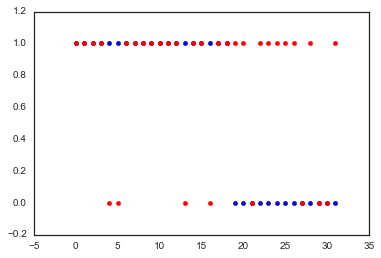

In [500]:
plt.scatter(DF.index, DF.From_Dostoevsky_Fact)
plt.scatter(DF.index, DF.Y_pred, color = 'red')

# Further analysis

In [245]:
positive = open('positive.txt').read()
negative = open('negative.txt').read()

In [252]:
positive_words = nltk.word_tokenize(positive) #FIX PRBLEM WITH INDEXES
negative_words = nltk.word_tokenize(negative)
df1 = pd.DataFrame({'words' : pd.Series(positive_words),
                    'sentiment' : 1
                   })
df2 = pd.DataFrame({'words' : pd.Series(negative_words),
                    'sentiment' : 0
                   })
frames = [df1, df2]
result = pd.concat(frames, axis = 0, ignore_index = True)
result

,sentiment,words
0,1,abound
1,1,abounds
2,1,abundance
3,1,abundant
4,1,accessable
5,1,accessible
6,1,acclaim
7,1,acclaimed
8,1,acclamation
9,1,accolade


In [467]:
dict_words = dict(zip(result.words, result.sentiment))
dict_words

{'enlighten': 1,
 'refutes': 0,
 'large-capacity': 1,
 'grieve': 0,
 'romantic': 1,
 'banal': 0,
 'optimal': 1,
 'banalize': 0,
 'ironical': 0,
 'beseech': 0,
 'instrumental': 1,
 'cheapest': 1,
 'rattles': 0,
 'inextricable': 0,
 'enticed': 1,
 'babble': 0,
 'uncreative': 0,
 'well-being': 1,
 'inclement': 0,
 'grimace': 0,
 'downsides': 0,
 'arduously': 0,
 'scarcity': 0,
 'cure': 1,
 'crept': 0,
 'charmingly': 1,
 'clogs': 0,
 'injury': 0,
 'precious': 1,
 'thrilling': 1,
 'knave': 0,
 'honor': 1,
 'maliciousness': 0,
 'irately': 0,
 'skillfully': 1,
 'ennoble': 1,
 'calamities': 0,
 'misbecoming': 0,
 'graft': 0,
 'defamation': 0,
 'anti-proliferation': 0,
 'impractical': 0,
 'sugar-coated': 0,
 'easing': 1,
 'brotherly': 1,
 'irritable': 0,
 'sadden': 0,
 'upsetting': 0,
 'havoc': 0,
 'bitter': 0,
 'groundbreaking': 1,
 'shady': 0,
 'ignominiously': 0,
 'shroud': 0,
 'inconsiderately': 0,
 'infamy': 0,
 'difficulty': 0,
 'manipulate': 0,
 'responsibly': 1,
 'repulsed': 0,
 'drunka

In [506]:
for word in dostoevsky_words:  #takes too long time
    if word in result.words:
        result['dostoevsky'] = result.words.map(dostoevsky_words)
result

,sentiment,words
0,1,abound
1,1,abounds
2,1,abundance
3,1,abundant
4,1,accessable
5,1,accessible
6,1,acclaim
7,1,acclaimed
8,1,acclamation
9,1,accolade
